# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats #to run 1-sample t-test
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [9]:
medical.shape

(1338, 8)

In [10]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [11]:
medical_charges = medical['charges']

# Sample mean or point estimate (M) ~= Population Mean (mu)
mu = np.mean(medical_charges)

# Sample Standard Deviation w/ Bessel's Correction ~= Population Standard Deviation 
s = np.std(medical_charges, ddof=1)

print('mean', round(mu, 1))
print('stdev', round(s, 1))

mean 13270.4
stdev 12110.0


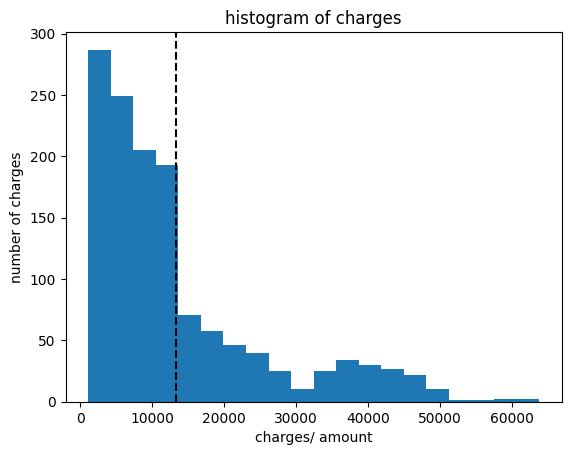

In [12]:
_ = plt.hist(medical['charges'], bins=20)
_ = plt.xlabel('charges/ amount')
_ = plt.ylabel('number of charges')
_ = plt.title('histogram of charges')
_ = plt.axvline(mu, color='black', linestyle = '--')

It is not appropriate to use the mean and standard deviation as appropriate statistics here because:
- the histogram shows that the curve of medical charges is right-skewed and not normally distributed. The outliers or higher values on the right, skew the mean. Median may be a better statistic.
- The standard deviation is also not the appropriate measure since the distribution is not normally distributed and is skewed to the right due to the outliers.

Also we are not sure if this sample is representative of the population we derive the data from.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Since the administrator is concerned with the actual average of charges falling below 12,000, we can use the one-sample, one-tailed t-test. We know the sample is random and sample size is sufficiently large (n> 30) so even though the random sample itself does not have a normal distribution (right skewed), the central limit theorem says that the distribution of sample means tends towards being normal and the mean of this sampling distribution approaches the population mean as the sample size increases (here n = 1383 samples). For a large sample size such as this, the t-test is more appropriate since the population standard deviation is not known. If it had been known we could have used z-test, especially since the sample size is >= 30.

We can use a 95% confidence interval since its the industry standard, so our alpha = 0.05 (5%) which is the tolerance for Type 1 (false positive test).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

Since the administrator is concerned with the actual average of charges falling below 12,000, we can use the <b>one-sample, one-tailed t-test</b>. 
- Null Hypothesis, H0: u0 >= 12,000. The actual average charge is greater than or equal to 12,000. Charges are still sustainable for the hospital. 
- Alternative Hypothesis, H1: u1 < 12,000. The actual average charge has fallen below 12,000 and is no longer sustainable for the hospital.
The null hypothesis is true, until proven otherwise. 

We can also use a 95% confidence interval since its the industry standard. This limits the risk of a Type 1 (false positive) error to 5%.
- alpha = 0.05 (5%)

In [27]:
# Calculating t-stats manually
# --------------------------------

# Hypothetical population mean
u = 12000

# Critical value for alpha = 0.05 (left-tailed test)
alpha = 0.05

# Degrees of freedom
deg_of_freedom = n-1 # 1337

sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
sample_size = medical.shape[0] # sample size
standard_error = sample_std/ np.sqrt(sample_size) # standard error of mean sampling distribution

# Calculate the t_critical
t_critical = t.ppf(alpha, df=deg_of_freedom)
print('t-critical: ', t_critical)

# Calculate the t-statistic
t_statistic = (sample_mean - u)/ standard_error
print('t-statistic: ', t_statistic)

# Calculate the one-tailed p-value of one-tailed test: P(T < t_stat)
p_value = stats.t.cdf(t_statistic, df=deg_of_freedom)
print('p-value: ', p_value)

t-critical:  -1.6459941145571324
t-statistic:  3.8373517196585323
p-value:  0.9999349141739535


In [28]:
# Alternatively using stats package to calculate t-value
# ------------------------------------------------------------------
t_stat, p_val = stats.ttest_1samp(medical_charges, popmean=12000) # This gives a two-tailed test. 

# To get a one-tail left-tail test
if t_stat < 0: 
    p_val = p_val/2 
else:
    p_val = 1 - (p_val/2)
print('t-statistic: ', t_stat)
print('p-value: ', p_val)

t-statistic:  3.8373517196585314
p-value:  0.9999349141739535


Since the p-value is greater than alpha (0.05), we *cannot* reject the null hypothesis in favor of the alternative hypothesis. So the null hypothesis holds and the average charge is >= $12,000. The administrator’s concern that the average has fallen below 12,000 is not supported by the data.

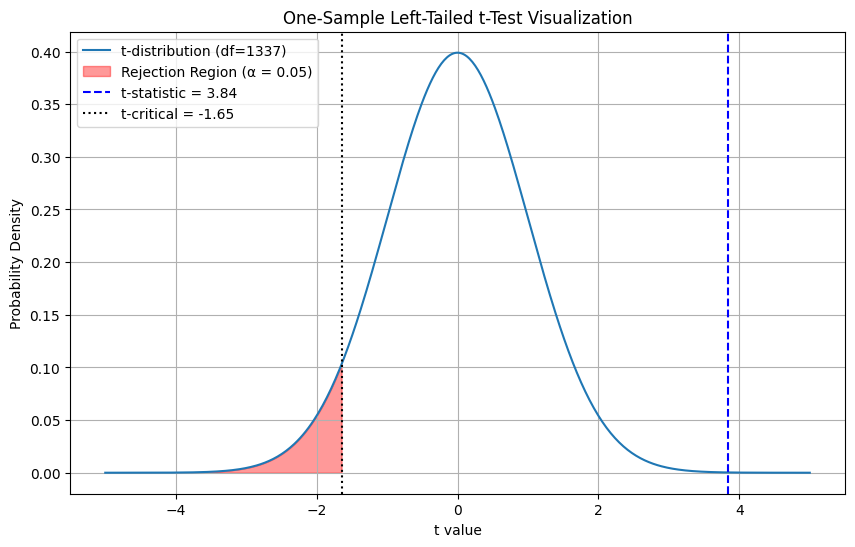

In [32]:
# Create t-distribution range
x = np.linspace(-5, 5, 500)
y = t.pdf(x, df=deg_of_freedom)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='t-distribution (df={})'.format(deg_of_freedom))

# Shade the left rejection region
x_fill = np.linspace(-5, t_critical, 200)
plt.fill_between(x_fill, t.pdf(x_fill, df=deg_of_freedom), color='red', alpha=0.4, label='Rejection Region (α = 0.05)')

# Plot the t-statistic line
plt.axvline(t_statistic, color='blue', linestyle='--', label='t-statistic = {:.2f}'.format(t_statistic))

# Plot the critical value line
plt.axvline(t_critical, color='black', linestyle=':', label='t-critical = {:.2f}'.format(t_critical))

# Labels and legend
plt.title('One-Sample Left-Tailed t-Test Visualization')
plt.xlabel('t value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ This is a <b>two-sample t-test for independent groups</b> (with and without insurance) 

- u_ins = mean charge for patients with insurance. 
- u_no_ins = mean charge for patients without insurance. 

Then:
- Null Hypothesis, H0. u_ins = u_no_ins. Thus, u_ins - u_no_ins = 0. There is no difference in the average charge between patients with and without insurance.
- Alternative Hypothesis, H1. u_ins <> u_no_ins. Thus, u_ins - u_no_ins <> 0. There is a difference in the average charge between patients with and without insurance.

This is a <b>two-tailed test</b>. 

Key Assumption: 
- We are assuming that the two independent samples come from <b>two populations which have the same variance</b>, i.e., var_ins = var_no_ins.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [44]:
# Get the approporiate datasets
with_insurance = medical[medical['insuranceclaim'] == 1]
no_insurance = medical[medical['insuranceclaim'] == 0]

In [47]:
# Get dataset size
n_with_insurance = with_insurance.shape[0]
n_no_insurance = no_insurance.shape[0]

# Calculate the means for the two samples
mu_with_insurance = np.mean(with_insurance['charges'])
mu_no_insurance = np.mean(no_insurance['charges'])

# Calculate the standard deviation for the two samples
s_with_insurance = np.std(with_insurance['charges'], ddof=1)
s_no_insurance = np.std(no_insurance['charges'], ddof=1)


print(f'sample size for patients with insurance: {n_with_insurance}')
print(f'sample mean for group with insurance: ${round(mu_with_insurance, 2)}')
print(f'standard deviation for group with insurance: ${round(s_with_insurance, 2)}\n')

print(f'sample size for patients without insurance: {n_no_insurance}')
print(f'sample mean for group without insurance: ${round(mu_no_insurance, 2)}')
print(f'standard deviation for group without insurance: ${round(s_no_insurance, 2)}')

sample size for patients with insurance: 783
sample mean for group with insurance: $16423.93
standard deviation for group with insurance: $14045.93

sample size for patients without insurance: 555
sample mean for group without insurance: $8821.42
standard deviation for group without insurance: $6446.51


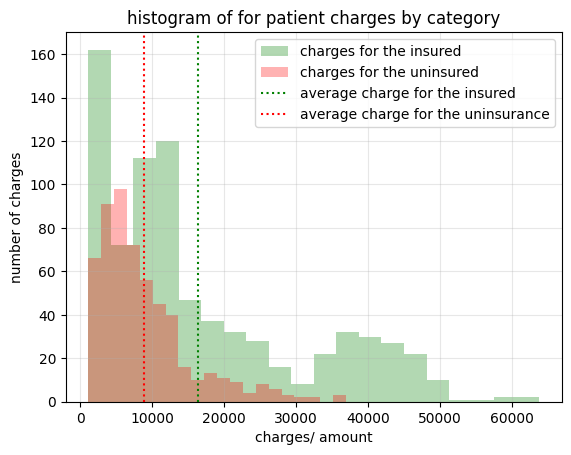

In [58]:
# Plot the histogram for the two categories
_ = plt.hist(with_insurance['charges'], bins=20, alpha=0.3, color = 'green', label='charges for the insured')
_ = plt.hist(no_insurance['charges'], bins=20, alpha=0.3, color = 'red', label='charges for the uninsured')

# Plot average charges
_ = plt.axvline(mu_with_insurance, color='green', linestyle = ':', label='average charge for the insured')
_ = plt.axvline(mu_no_insurance, color='red', linestyle = ':', label='average charge for the uninsurance')

_ = plt.xlabel('charges/ amount')
_ = plt.ylabel('number of charges')
_ = plt.title('histogram of for patient charges by category')
_ = plt.legend()
_ = plt.grid(alpha=0.3)




In [13]:
# Calculate Manually

# 1. Calculate the pooled standard deviation, sp
num = ((n_with_insurance - 1) * s_with_insurance**2) + ((n_no_insurance - 1) * s_no_insurance**2)
denom = n_with_insurance + n_no_insurance - 2
sp = np.sqrt(num/denom)

# 2. calculate the t-statistic for two independent samples
num = mu_with_insurance - mu_no_insurance
denom = sp * np.sqrt((1/n_with_insurance) + (1/n_no_insurance))
t_manual = num/ denom
print('t_stat: ', t_manual)

# 3. p-value calculation
df = n_with_insurance + n_no_insurance - 2
p_val = (1 - stats.t.cdf(t_manual, df=df)) * 2 # for two-sided tail test
print('p value: ', p_val)

t_stat:  11.89329903087671
p value:  0.0


In [14]:
stats.ttest_ind_from_stats?

Signature:
stats.ttest_ind_from_stats(
    mean1,
    std1,
    nobs1,
    mean2,
    std2,
    nobs2,
    equal_var=True,
    alternative='two-sided',
)
Docstring:
T-test for means of two independent samples from descriptive statistics.

This is a test for the null hypothesis that two independent
samples have identical average (expected) values.

Parameters
----------
mean1 : array_like
    The mean(s) of sample 1.
std1 : array_like
    The corrected sample standard deviation of sample 1 (i.e. ``ddof=1``).
nobs1 : array_like
    The number(s) of observations of sample 1.
mean2 : array_like
    The mean(s) of sample 2.
std2 : array_like
    The corrected sample standard deviation of sample 2 (i.e. ``ddof=1``).
nobs2 : array_like
    The number(s) of observations of sample 2.
equal_var : bool, optional
    If True (default), perform a standard independent 2 sample test
    that assumes equal population variances [1]_.
    If False, perform Welch's t-test, which does not assume equal
   

In [15]:
t_stat, p_val = stats.ttest_ind_from_stats(mean1=mu_with_insurance,
                                           std1=s_with_insurance,
                                           nobs1=n_with_insurance,
                                           mean2=mu_no_insurance,
                                           std2=s_no_insurance,
                                           nobs2=n_no_insurance,
                                           alternative='two-sided')
print(t_stat, p_val)

11.893299030876712 4.461230231620717e-31


Since p-value (~0) is less than the alpha of 0.05, this shows a strong evidence against the null hypothesis in favor of the alternative.
Thus the average charges for the sample with insurance compared to the average charges for the sample without insurance are not the same.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I cannot find an equivalent z-test in scipy.stats, so I will need to calculate this manually. This is probably because in practice a z-test is rarely used in the real world with sample data and we rarely ever know the population standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test